In [1]:
import pandas as pd
import glob
import numpy as np
filenames = glob.glob('/home/raulteixeira/scratch-midway2/CosmicShearData/DELVE_BDF_data_with_zspec022123_*.gz')

In [2]:
dfs = []
for i, filename in enumerate(filenames):
    data = pd.read_csv(filename)
    print(len(data))
    for column in data.columns:
        if column[4:8]=='FLUX':
            data[column]*=1e-12
    dfs.append(data)
    #data.to_hdf(f'/home/raulteixeira/scratch-midway2/CosmicShearData/DELVE_BDF_data_with_zspec022123_{i+1}.h5', key='df')

97956
95341
106967
105799
106608


In [3]:
df = pd.concat(dfs)

In [5]:
df = df[df['BDF_MAG_I']>21]

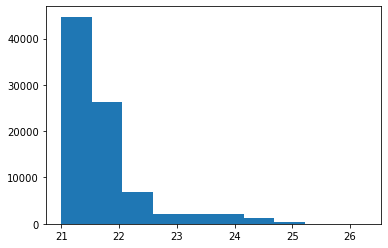

In [7]:
import matplotlib.pyplot as plt
plt.hist(df['BDF_MAG_I']);

In [9]:
df.to_hdf('/home/raulteixeira/scratch-midway2/CosmicShearData/DELVE_BDF_data_with_zspec022123_mag_gt21.h5', key='df')

In [36]:
filenames = glob.glob('/home/raulteixeira/scratch-midway2/CosmicShearData/DELVE_BDF_data_with_zspec022123_*.csv.gz')

In [37]:
filenames = np.sort(filenames)

In [38]:
filenames

array(['/home/raulteixeira/scratch-midway2/CosmicShearData/DELVE_BDF_data_with_zspec022123_1.csv.gz',
       '/home/raulteixeira/scratch-midway2/CosmicShearData/DELVE_BDF_data_with_zspec022123_2.csv.gz',
       '/home/raulteixeira/scratch-midway2/CosmicShearData/DELVE_BDF_data_with_zspec022123_3.csv.gz',
       '/home/raulteixeira/scratch-midway2/CosmicShearData/DELVE_BDF_data_with_zspec022123_4.csv.gz',
       '/home/raulteixeira/scratch-midway2/CosmicShearData/DELVE_BDF_data_with_zspec022123_5.csv.gz'],
      dtype='<U91')

In [39]:
dfs = []
for filename in filenames:
    data = pd.read_csv(filename)
    dfs.append(data)
df = pd.concat(dfs)

In [41]:
df.to_csv('/home/raulteixeira/scratch-midway2/CosmicShearData/DELVE_BDF_data_with_zspec022123.csv.gz')

In [3]:
import h5py
filenames = glob.glob('/home/raulteixeira/repos/DESC_BPZ/tests/pz_DELVE_BDF_eazy*.h5')
filenames = np.sort(filenames)

dfs = []
for i, filename in enumerate(filenames):
    file = h5py.File(filename)
    data_zp={}
    for key in file.keys():
        if key=='ID':
            data_zp['COADD_OBJECT_ID']=np.array(file[key])
        else: data_zp[key]=np.array(file[key])

    t_bpz_zp = pd.DataFrame(data_zp)
    dfs.append(t_bpz_zp)
    print(i)
df = pd.concat(dfs)

0
1
2
3
4


In [5]:
df.to_csv('/project2/chihway/raulteixeira/data/pz_DELVE_BDF_eazy.csv.gz')